<a href="https://colab.research.google.com/github/nandansuresh97/practise-/blob/main/zscore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#zscore
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import seaborn as sns
data1 = pd.read_csv('/content/beer-servings.csv',index_col='Unnamed: 0')
data1.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,Albania,89.0,132.0,54.0,4.9,Europe
2,Algeria,25.0,0.0,14.0,0.7,Africa
3,Andorra,245.0,138.0,312.0,12.4,Europe
4,Angola,217.0,57.0,45.0,5.9,Africa


<ipython-input-3-d1dca12d0ebe>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data1['wine_servings'])


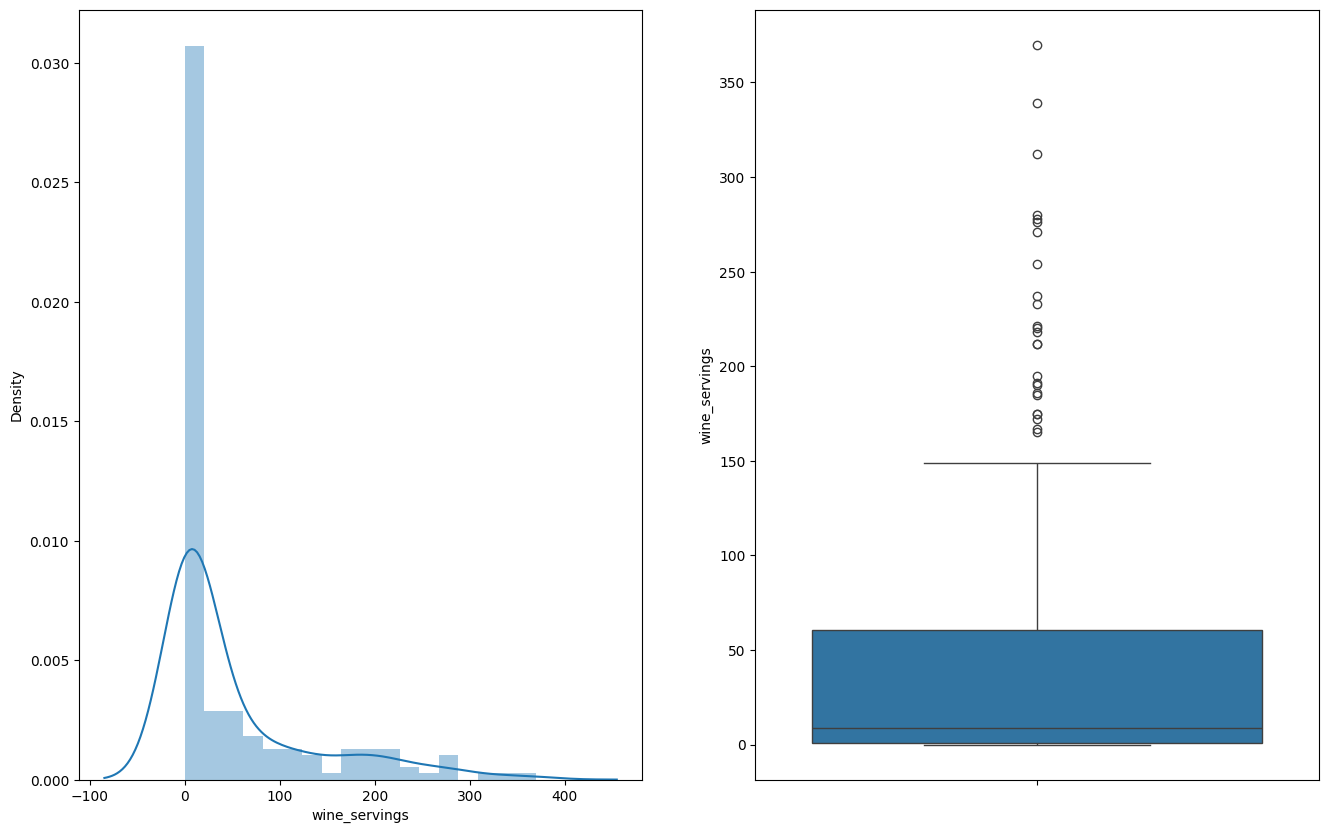

In [3]:
plt.figure(figsize=(16,10))
plt.subplot(1,2,1)
sns.distplot(data1['wine_servings'])


plt.subplot(1,2,2)
sns.boxplot(data1['wine_servings'])
plt.show()

In [4]:
from scipy.stats import zscore
zscore = zscore(data1.wine_servings,nan_policy='omit')
data1['zscore'] = zscore
data1.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,zscore
0,Afghanistan,0.0,0.0,0.0,0.0,Asia,-0.625948
1,Albania,89.0,132.0,54.0,4.9,Europe,0.047842
2,Algeria,25.0,0.0,14.0,0.7,Africa,-0.451262
3,Andorra,245.0,138.0,312.0,12.4,Europe,3.267059
4,Angola,217.0,57.0,45.0,5.9,Africa,-0.064456


In [5]:
#Removing unnecessary fields
data1.drop(columns = ['beer_servings'	,'spirit_servings','total_litres_of_pure_alcohol'],axis = 1 ,inplace = True)
data1.head()

,country,wine_servings,continent,zscore
0,Afghanistan,0.0,Asia,-0.625948
1,Albania,54.0,Europe,0.047842
2,Algeria,14.0,Africa,-0.451262
3,Andorra,312.0,Europe,3.267059
4,Angola,45.0,Africa,-0.064456


In [6]:
#Basic data regarding the field wine_servings
print("Mean of data",data1['wine_servings'].mean())
print("Std deviation of data",data1['wine_servings'].std())
print("Max of data",data1['wine_servings'].max())
print("Min of data",data1['wine_servings'].min())


Mean of data 50.16577540106952
Std deviation of data 80.35886783413324
Max of data 370.0
Min of data 0.0


In [7]:

#find the limits
low_lim = data1.wine_servings.mean() - 3 * data1.wine_servings.std()
up_lim = data1.wine_servings.mean() + 3 * data1.wine_servings.std()

print("lower limit is",low_lim)
print("Upper limit is",up_lim)

lower limit is -190.9108281013302
Upper limit is 291.2423789034692


In [8]:

#Outliers

#Taking threshold as +-3

data1[(data1.zscore < -3) | (data1.zscore > 3)]

,country,wine_servings,continent,zscore
3,Andorra,312.0,Europe,3.267059
61,France,370.0,Europe,3.990759
136,Portugal,339.0,Europe,3.603953


In [9]:
#Outliers Removed
data1 = data1[(data1.zscore > -3) & (data1.zscore < 3)]
data1

,country,wine_servings,continent,zscore
0,Afghanistan,0.0,Asia,-0.625948
1,Albania,54.0,Europe,0.047842
2,Algeria,14.0,Africa,-0.451262
4,Angola,45.0,Africa,-0.064456
5,Antigua & Barbuda,45.0,North America,-0.064456
...,...,...,...,...
188,Venezuela,3.0,South America,-0.588515
189,Vietnam,1.0,Asia,-0.613470
190,Yemen,0.0,Asia,-0.625948
191,Zambia,4.0,Africa,-0.576037


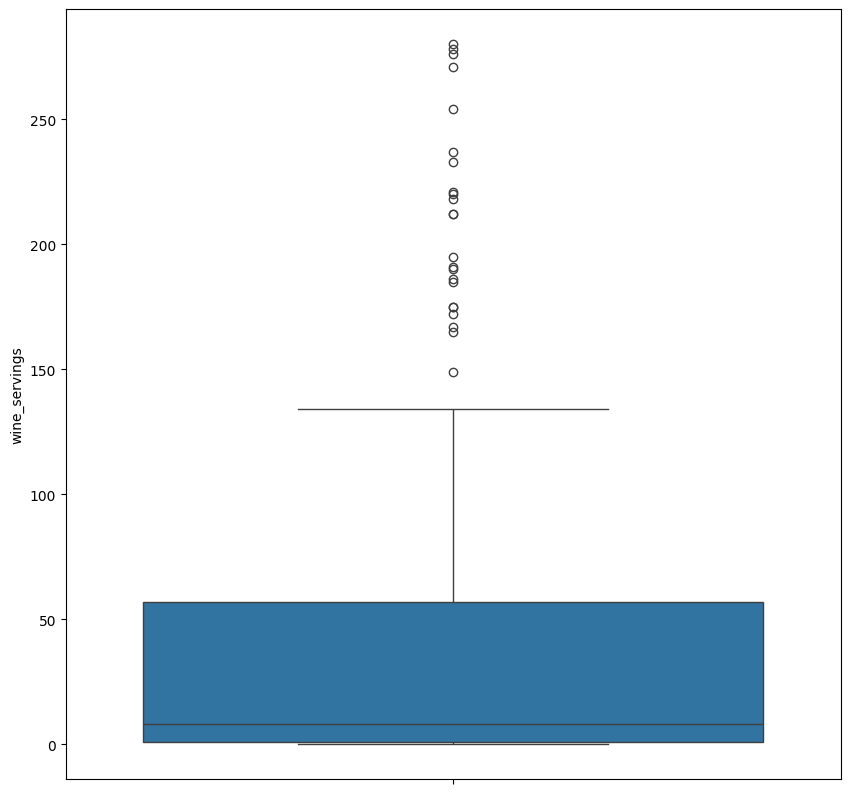

In [10]:
plt.figure(figsize=(10,10))
sns.boxplot(data1['wine_servings'])
plt.show()

In [13]:
#Outliers removed using ilimits ||| Not need
data1.loc[(data1.wine_servings < up_lim) & (data1.wine_servings > low_lim)]


,country,wine_servings,continent,zscore
0,Afghanistan,0.0,Asia,-0.625948
1,Albania,54.0,Europe,0.047842
2,Algeria,14.0,Africa,-0.451262
4,Angola,45.0,Africa,-0.064456
5,Antigua & Barbuda,45.0,North America,-0.064456
...,...,...,...,...
188,Venezuela,3.0,South America,-0.588515
189,Vietnam,1.0,Asia,-0.613470
190,Yemen,0.0,Asia,-0.625948
191,Zambia,4.0,Africa,-0.576037


In [15]:
#Outliers Removed
data1 = data1[(data1.zscore > -3) & (data1.zscore < 3)]
data1

,country,wine_servings,continent,zscore
0,Afghanistan,0.0,Asia,-0.625948
1,Albania,54.0,Europe,0.047842
2,Algeria,14.0,Africa,-0.451262
4,Angola,45.0,Africa,-0.064456
5,Antigua & Barbuda,45.0,North America,-0.064456
...,...,...,...,...
188,Venezuela,3.0,South America,-0.588515
189,Vietnam,1.0,Asia,-0.613470
190,Yemen,0.0,Asia,-0.625948
191,Zambia,4.0,Africa,-0.576037
